# Importing Data from SQL

In [27]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import MySQLdb
import getpass
username = input('enter the username:')
password = getpass.getpass(prompt="enter password")
conn = MySQLdb.connect(host="localhost", user= username, passwd=password, db= 'I501Sp21grp1_db')
cursor = conn.cursor()

cursor.execute("select * from metadata")
rows = cursor.fetchall()
headers = [i[0] for i in cursor.description]
headers[0] = 'Sample_ID'
data_dict = {}

for row in rows:
    for i in range(len(row)):
        if not headers[i] in data_dict:
            data_dict[headers[i]] = [row[i]]
        else:
            data_dict[headers[i]].append(row[i])

import pandas as pd
metadata_df = pd.DataFrame.from_dict(data_dict)
metadata_df= metadata_df.set_index('Sample_ID')
metadata_df

nan_value = float("NaN")
metadata_df['NG_MAST']=metadata_df['NG_MAST'].replace(to_replace="-", value = nan_value)

from tabulate import tabulate
metadata_df = metadata_df.dropna()
tabulate(metadata_df, headers=headers, tablefmt='psql')


enter the username:sdeviset
enter password········


'+-------------+--------+-----------+-------------+----------------+-----------+---------+-----------+----------------+----------+\n| Sample_ID   |   Year | Country   | Continent   |   Azithromycin | NG_MAST   |   Group |   azm_mic |   log2_azm_mic |   azm_sr |\n|-------------+--------+-----------+-------------+----------------+-----------+---------+-----------+----------------+----------|\n| 10356_1#15  |   1998 | USA       | America     |          0.125 | 270       |     195 |     0.125 |       -3       |        0 |\n| 10356_1#16  |   1998 | USA       | America     |          0.094 | 64        |     372 |     0.094 |       -3.4112  |        0 |\n| 10356_1#17  |   1998 | USA       | America     |          0.094 | 26        |     193 |     0.094 |       -3.4112  |        0 |\n| 10356_1#19  |   1998 | USA       | America     |          0.064 | 272       |     196 |     0.064 |       -3.96578 |        0 |\n| 10356_1#21  |   2003 | USA       | America     |          0.25  | 925       |   

# Data Cleaning

In [42]:
metadata_df=metadata_df.drop(["Country" , "Continent", "Group", "azm_mic", "NG_MAST"], axis=1)

# Rename log2_azm_mic to Log2(Azithromycin)
metadata_df = metadata_df.rename(columns={"log2_azm_mic":"Log2(Azithromycin)"})

metadata_headers = ['Sample_ID', 'Year', 'Azithromycin', 'Log2(Azithromycin)', 'azm_sr']

metadata_df = metadata_df.sort_values(by='Year')
print(tabulate(metadata_df, headers=metadata_headers))

Sample_ID      Year    Azithromycin    Log2(Azithromycin)    azm_sr
-----------  ------  --------------  --------------------  --------
10356_1#15     1998           0.125              -3               0
10356_1#16     1998           0.094              -3.4112          0
10356_1#17     1998           0.094              -3.4112          0
10356_1#19     1998           0.064              -3.96578         0
10356_1#20     1999           4                   2               1
17150_8#68     2000           1                   0               0
17176_1#72     2000           0.25               -2               0
17150_8#83     2000           2                   1               0
17176_1#70     2000           0.25               -2               0
17176_1#58     2000           0.25               -2               0
17150_8#82     2000           2                   1               0
17150_8#80     2000           2                   1               0
17150_8#77     2000           4                 

# Changing the data types

In [234]:
metadata_df['Azithromycin']=metadata_df['Azithromycin'].astype(int)
metadata_df['Log2(Azithromycin)']=metadata_df['Log2(Azithromycin)'].astype(float)
metadata_df['Year']=metadata_df['Year'].astype(int)

In [235]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 17150_8#68 to 17176_1#4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                846 non-null    int64  
 1   Azithromycin        846 non-null    int64  
 2   Log2(Azithromycin)  846 non-null    float64
 3   azm_sr              846 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 73.0+ KB


In [236]:
metadata_df

,Year,Azithromycin,Log2(Azithromycin),azm_sr
Sample_ID,,,,
17150_8#68,2000,1,0.0,0
17176_1#72,2000,0,-2.0,0
17150_8#83,2000,2,1.0,0
17176_1#70,2000,0,-2.0,0
17176_1#58,2000,0,-2.0,0
...,...,...,...,...
17176_1#16,2013,0,-2.0,0
15335_7#53,2013,2,1.0,0
16043_2#18,2013,0,-1.0,0


# Descriptive Statistics

In [237]:
metadata_df.columns

Index(['Year', 'Azithromycin', 'Log2(Azithromycin)', 'azm_sr'], dtype='object')

In [238]:
metadata_df.describe()

,Year,Azithromycin,Log2(Azithromycin),azm_sr
count,846.000000,846.000000,846.000000,846.000000
mean,2008.528369,1.680851,-0.459785,0.114657
std,3.696603,9.275139,1.661875,0.318796
min,2000.000000,0.000000,-5.058894,0.000000
25%,2005.000000,0.000000,-1.000000,0.000000
50%,2010.000000,0.000000,-1.000000,0.000000
75%,2011.000000,1.000000,0.000000,0.000000
max,2013.000000,256.000000,8.000000,1.000000


In [239]:
metadata_df.corr(method = 'spearman')

,Year,Azithromycin,Log2(Azithromycin),azm_sr
Year,1.000000,-0.135345,-0.101778,-0.092925
Azithromycin,-0.135345,1.000000,0.919604,0.616924
Log2(Azithromycin),-0.101778,0.919604,1.000000,0.567326
azm_sr,-0.092925,0.616924,0.567326,1.000000


<AxesSubplot:>

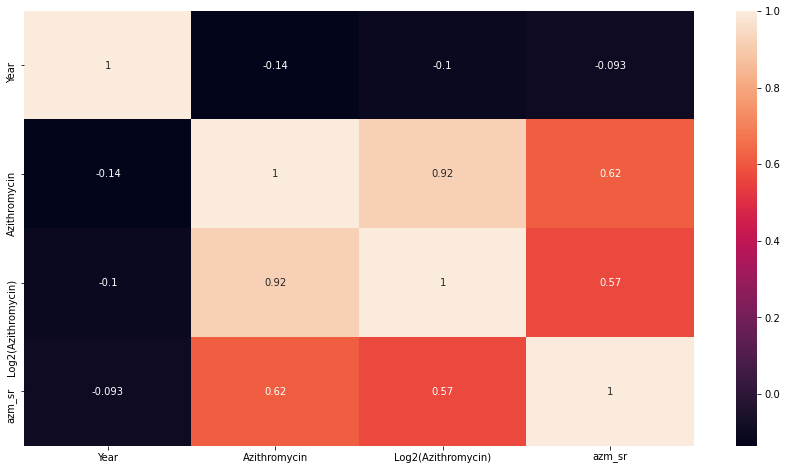

In [240]:
#Heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(metadata_df.corr(method = 'spearman'),annot=True)

<AxesSubplot:>

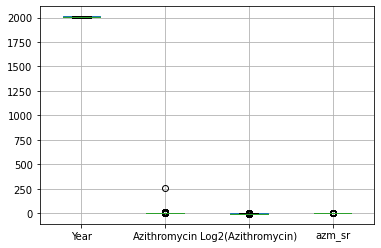

In [241]:
metadata_df.boxplot()

In [ ]:
metadata_df.boxplot(column=['Azithromycin'])

In [ ]:
# import pandas as pd
# metadata_df = pd.read_csv('metadata.csv')
# metadata_df[metadata_df.Azithromycin > 200]

In [270]:
metadata_df[metadata_df.Azithromycin > 200]

,Year,Azithromycin,Log2(Azithromycin),azm_sr
Sample_ID,,,,
15335_7#17,2012,256,8.0,1


In [271]:
metadata_df.drop([15335_7#17],inplace = True)

SyntaxError: unexpected EOF while parsing (<ipython-input-271-a40bcfd6f866>, line 1)

In [ ]:
metadata_df[metadata_df.Azithromycin > 200]

In [ ]:
metadata_df.boxplot(column=['Azithromycin'])

In [ ]:
plt.bar(metadata_df.Year,metadata_df.Azithromycin,color = 'red')

In [ ]:
metadata_df.hist()

In [ ]:
#plt.bar(metadata_df.Year,metadata_df.Log2(Azithromycin),color = 'red')

# Group by

In [ ]:
group = metadata_df.groupby(['Year','azm_sr'])['azm_sr'].count()
group

In [ ]:
group.hist()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['98-99','00','01','02','03','04','05','06','07','08','09','10','11','12','13']
mutations = [1,1,1,2, 6,12,16,5,7,3,7,12,7,8,10]
#normal =    [4,25,18,34,21,51,33,13,39,6,100,92,149,95,74]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mutations, width, label='Mutations')
#rects2 = ax.bar(x + width/2, normal, width, label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.set_title('Resistance Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Normality Test

In [44]:
from scipy import stats
a = stats.normaltest(metadata_df['azm_sr'])
a

NormaltestResult(statistic=398.729496175648, pvalue=2.612101324694e-87)

# Wilcoxon Test

In [45]:
z = metadata_df[metadata_df['azm_sr'] == 0]['Azithromycin']
x = metadata_df[metadata_df['azm_sr'] == 1]['Azithromycin']
y = metadata_df[ 'Azithromycin']

In [47]:
stats.wilcoxon(x, y=None, zero_method='wilcox', correction=False ) #alternative='two-sided', mode='auto'

WilcoxonResult(statistic=0.0, pvalue=2.719738808956474e-18)

# Training the data 

In [12]:
df9 = metadata_df[metadata_df.azm_sr > 0]
df9

,Year,Azithromycin,Log2(Azithromycin),azm_sr
Sample_ID,,,,
10356_1#20,1999,4,2.0,1
17150_8#77,2000,4,2.0,1
17225_3#7,2001,4,2.0,1
17225_3#12,2002,4,2.0,1
17225_3#35,2002,4,2.0,1
...,...,...,...,...
15335_7#33,2013,8,3.0,1
15335_7#55,2013,8,3.0,1
15335_7#26,2013,4,2.0,1


In [113]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import time

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df9[['Azithromycin']],df9.azm_sr, test_size = 0.1, random_state = 0)

# Decision Tree Classifier

In [115]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

Y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

1.0

# XGBoost

# Random Forest

In [ ]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,Y_train)
rf_clf.score(X_train,Y_train)

# Gradient Boost

In [ ]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(X_train,Y_train)
gb_clf.score(X_train,Y_train)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)
nb_clf.score(X_train,Y_train)

# ROC curve

In [ ]:
#Try AUROC

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
plot_roc_curve(nb_clf, X_test, Y_test)
plt.plot([0,1], [0,1], c='k')

# Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

# Reading the GWAS data

In [50]:
import pandas as pd
gwas_data = pd.read_csv("gwas_data.csv")
gwas_data

,pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,17150_8#77,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,17150_8#68,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,17150_8#69,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,17150_8#70,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,17150_8#71,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,SRR2736302,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1481,SRR2736303,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1482,SRR2736304,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1483,SRR2736305,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# # import pandas as pd
# gwas_data1 = pd.read_csv("final.csv")
# gwas_data1

# Integrating GWAS with Metadata

In [51]:
metadata_df = metadata_df[metadata_df.index.isin(gwas_data.pattern_id)]
gwas_data = gwas_data[gwas_data.pattern_id.isin(metadata_df.index)]
metadata_df
gwas_data

,pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,17150_8#77,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,17150_8#68,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,17150_8#72,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6,17150_8#73,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
7,17150_8#74,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,17176_1#4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1109,17176_1#5,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1110,17176_1#6,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1111,17176_1#7,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


# Integrating Metadata with GWAS data

In [52]:
metadata_df = metadata_df[metadata_df.index.isin(gwas_data.pattern_id)]
gwas_data = gwas_data[gwas_data.pattern_id.isin(metadata_df.index)]
metadata_df
gwas_data

,pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,17150_8#77,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,17150_8#68,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,17150_8#72,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6,17150_8#73,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
7,17150_8#74,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,17176_1#4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1109,17176_1#5,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1110,17176_1#6,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1111,17176_1#7,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


# GWAS Data Analysis

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import time

# Training the data

In [54]:
X = gwas_data.reindex(columns=list(gwas_data.columns)[1:])
y = metadata_df.azm_sr

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_result = {}

def fit_model(classifier, X_train, X_test, y_train, y_test):
  result = {}
  start = time.process_time()
  model = classifier.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  result['time'] = time.process_time() - start
  result['accuracy'] = metrics.accuracy_score(y_test,y_pred)*100
  result['roc_auc_score'] = metrics.roc_auc_score(y_test, y_pred)
  result['model'] = model

  return result

sgdc_enet = SGDClassifier(loss="log", penalty="elasticnet", l1_ratio=0.1)
model_result['SGDClassifer - Elasticnet']  = fit_model(sgdc_enet, X_train, X_test, y_train, y_test)

lsvc = LinearSVC(max_iter=7000)
model_result['LinearSVC'] = fit_model(lsvc, X_train, X_test, y_train, y_test)

dec_tree_gini = tree.DecisionTreeClassifier(criterion='gini')
model_result['DT - Gini'] = fit_model(dec_tree_gini, X_train, X_test, y_train, y_test)

dec_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy')
model_result['DT - Entropy'] = fit_model(dec_tree_entropy, X_train, X_test, y_train, y_test)

abc = AdaBoostClassifier()
model_result['AdaBoostClassifier'] = fit_model(abc, X_train, X_test, y_train, y_test)

etc_gini = ExtraTreesClassifier(criterion='gini')
model_result['ExtraTreesClassifier - Gini'] = fit_model(etc_gini, X_train, X_test, y_train, y_test)

etc_entropy = ExtraTreesClassifier(criterion='entropy')
model_result['ExtraTreesClassifier - Entropy'] = fit_model(etc_gini, X_train, X_test, y_train, y_test)

gbc = GradientBoostingClassifier()
model_result['GradientBoostingClassifier'] = fit_model(gbc, X_train, X_test, y_train, y_test)

rfc_gini = RandomForestClassifier(criterion='gini')
model_result['RandomForestClassifier - Gini'] = fit_model(rfc_gini, X_train, X_test, y_train, y_test)

rfc_gini = RandomForestClassifier(criterion='entropy')
model_result['RandomForestClassifier - Entropy'] = fit_model(rfc_gini, X_train, X_test, y_train, y_test)

ml_model_df = pd.DataFrame.from_dict(model_result)
ml_model_df = ml_model_df.drop(index='model')
print(tabulate(ml_model_df, headers = ml_model_df.columns, tablefmt='grid'))

+---------------+-----------------------------+-------------+-------------+----------------+----------------------+-------------------------------+----------------------------------+------------------------------+---------------------------------+------------------------------------+
|               |   SGDClassifer - Elasticnet |   LinearSVC |   DT - Gini |   DT - Entropy |   AdaBoostClassifier |   ExtraTreesClassifier - Gini |   ExtraTreesClassifier - Entropy |   GradientBoostingClassifier |   RandomForestClassifier - Gini |   RandomForestClassifier - Entropy |
+===============+=============================+=============+=============+================+======================+===============================+==================================+==============================+=================================+====================================+
| time          |                    0.298727 |    2.95502  |    0.338068 |       0.237101 |             0.748622 |                      0.387801

In [55]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9038461538461539

In [56]:
meta_gwas_data = gwas_data.copy()
meta_gwas_data = meta_gwas_data.rename(columns={'pattern_id':'Sample_ID'})
meta_gwas_data = pd.merge(metadata_df, meta_gwas_data, on='Sample_ID')
gwas_data_patterns = meta_gwas_data.copy()
gwas_data_patterns_columns = list(gwas_data.columns)
gwas_data_patterns_columns.insert(1,'Year')
gwas_data_patterns_columns.pop(0)
meta_gwas_data=meta_gwas_data.reindex(columns=gwas_data_patterns_columns)

yr_vs_resistance_df = meta_gwas_data.groupby(["Year"])[gwas_data_patterns_columns[1:]].sum().reset_index()
yr_vs_resistance_df['count'] = yr_vs_resistance_df['Year'].map(meta_gwas_data['Year'].value_counts())
yr_vs_resistance_df['Year'] = yr_vs_resistance_df['Year'].astype(int)
yr_vs_resistance_df['Year'] = yr_vs_resistance_df['Year'].astype(str)
yr_vs_resistance_df_cols = yr_vs_resistance_df.columns

yr_vs_resistance_perc_df = yr_vs_resistance_df.copy()
yr_vs_resistance_perc_df[yr_vs_resistance_df_cols[1:-1]] = yr_vs_resistance_df[yr_vs_resistance_df_cols[1:-1]]*100
yr_vs_resistance_perc_df[yr_vs_resistance_df_cols[1:-1]]=yr_vs_resistance_perc_df[yr_vs_resistance_df_cols[1:-1]].div(yr_vs_resistance_df['count'], axis=0)

# print(tabulate(yr_vs_resistance_perc_df, headers=yr_vs_resistance_perc_df.columns))


def plot_resistance_perc_vs_year(features):
  plot_df = yr_vs_resistance_perc_df.copy()
  plot_df=plot_df.reindex(columns=list(features))
  plt.plot(yr_vs_resistance_perc_df['Year'], plot_df, '-o')
  plt.xticks(np.arange(0, yr_vs_resistance_perc_df['Year'].count()), yr_vs_resistance_perc_df['Year'], rotation=60, ha='right')
  plt.legend(list(features))


# Getting the top 10 features exhibiting mutation in various ML models and plotting resistance percentage per year of various models

In [59]:
import numpy as np
def get_top_features_and_plot(classifier_name):
  coef = model_result[classifier_name]['model'].coef_.ravel()

  feature = X.columns

  top_positive_coefficients = np.argsort(coef)[-5:]
  top_negative_coefficients = np.argsort(coef)[:5]
  top_coef = np.hstack([top_negative_coefficients, top_positive_coefficients])

  plt.title("Feature Importances %s - Azithromycin Resistance" %(classifier_name))
  colors = ['orange' if c < 0 else 'green' for c in coef[top_coef]]
  plt.bar(np.arange(10), coef[top_coef], color=colors)
  feature_names = np.array(feature)
  plt.xticks(np.arange(0, 10), feature_names[top_coef], rotation=60, ha='right')
  plt.show()
  return feature_names[top_coef]

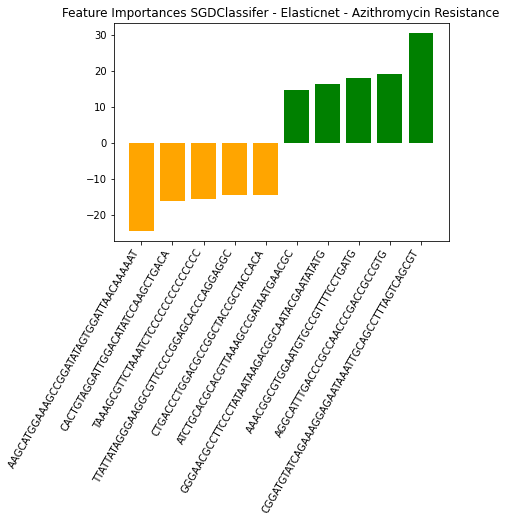

In [60]:
sgdc_enet_top10_features = get_top_features_and_plot('SGDClassifer - Elasticnet')


In [242]:
sgdc_enet_top10_features

array(['AAGCATGGAAAGCCGGATATAGTGGATTAACAAAAAT',
       'CACTGTAGGATTGGACATATCCAAGCTGACA',
       'TAAAGCGTTCTAAATCTCCCCCCCCCCCCCC',
       'TTATTATAGGGAAGGCGTTCCCCGGAGCACCCAGGAGGC',
       'CTGACCCTGGACGCCGGCTACCGCTACCACA',
       'ATCTGCACGCACGTTAAAGCCGATAATGAACGC',
       'GGGAACGCCTTCCCTATAATAAGACGGCAATACGAATATATG',
       'AAACGGCGTGGAATGTGCCGTTTTCCTGATG',
       'AGGCATTTGACCCGCCAACCCGACCGCCGTG',
       'CGGATGTATCAGAAAGGAGAATAAATTGCAGCCTTTAGTCAGCGT'], dtype=object)

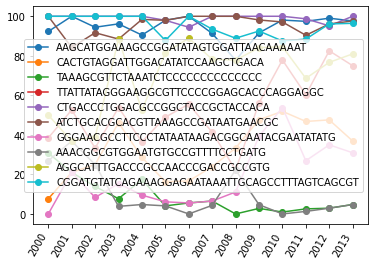

In [61]:
plot_resistance_perc_vs_year(sgdc_enet_top10_features)

perform mancova, search for snp database

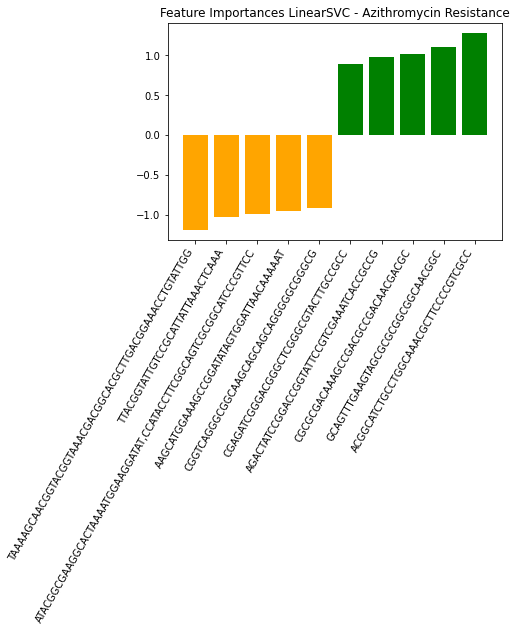

In [63]:
lsvc_top10_features = get_top_features_and_plot('LinearSVC')

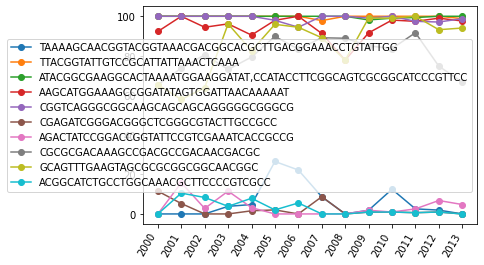

In [64]:
plot_resistance_perc_vs_year(lsvc_top10_features)  

In [65]:
def get_important_features_and_plot(classifier_name):
  importances = model_result[classifier_name]['model'].feature_importances_
  indices = np.argsort(importances)[::-1][:10]
  feature = X.columns
  feature_names = np.array(feature)
  print("top_predictors: ", np.asarray(feature)[indices])
  plt.bar(range(10), importances[indices])
  plt.xticks(range(10), np.asarray(feature_names)[indices], rotation=60, ha='right')
  plt.show()
  return np.asarray(feature_names)[indices]

top_predictors:  ['TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'AAAAACCAAGAAGTTCGCTTAAATAATATAG'
 'AGGCGTTTGCGTTGCGAGGAGTTCATCTCGTATGCCGTCTTCTGC'
 'AAACGGCGTGGAATGTGCCGTTTTCCTGATG' 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT'
 'GTTGAAAAAATCTTTAGCTACGTCAACGCGGGTAATTTTT'
 'ACAAACAAACTGGGGATATTATATGCATATC' 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC'
 'TAATCAAAACCTCGTCTATACGACAGAAGACC']


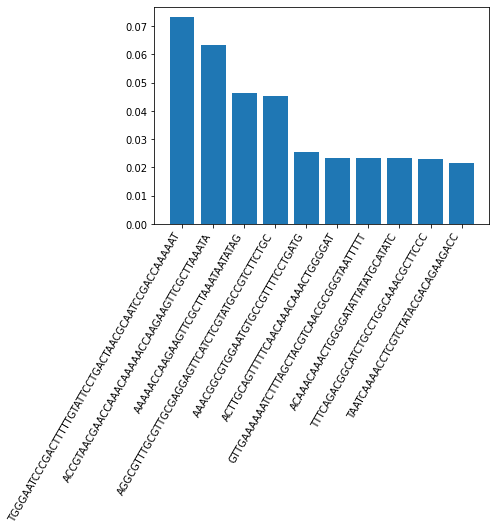

In [66]:
dec_tree_gini_important_features = get_important_features_and_plot('DT - Gini')

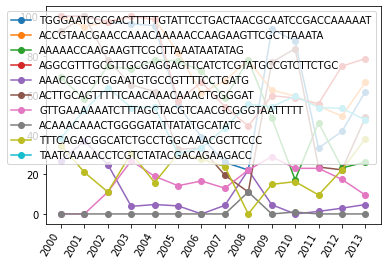

In [67]:
plot_resistance_perc_vs_year(dec_tree_gini_important_features)

top_predictors:  ['AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'AGGCGTTTGCGTTGCGAGGAGTTCATCTCGTATGCCGTCTTCTGC'
 'GGGAACGCCTTCCCTATAATAAGACGGCAATACGAATATATG'
 'GTGTTACGCAATATATAAGGGGTTGCCGTTCC' 'CATCACCTTAGGGAATCGTTCCCTTTGGGCC'
 'GACCCGCCAACCCGACCGCCGTGATTCCCGC'
 'CGGATGTATCAGAAAGGAGAATAAATTGCAGCCTTTAGTCAGCGT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'GTTGAAAAAATCTTTAGCTACGTCAACGCGGGTAATTTTT']


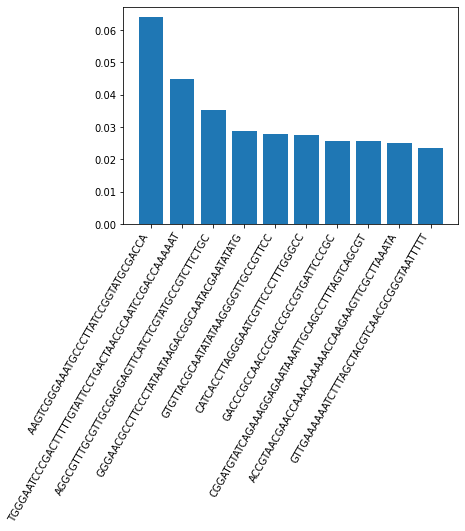

In [68]:
dec_tree_entropy_important_features = get_important_features_and_plot('DT - Entropy')

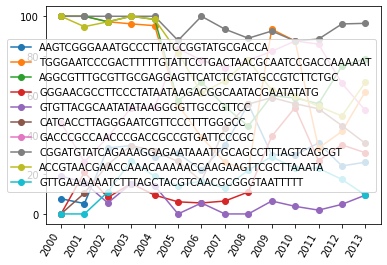

In [69]:
plot_resistance_perc_vs_year(dec_tree_entropy_important_features)

top_predictors:  ['AAACGGCGTGGAATGTGCCGTTTTCCTGATG' 'AAGGGCTGATTATCCGGAGCGACCGTAACGAA'
 'AAGCATGGAAAGCCGGATATAGTGGATTAACAAAAAT'
 'CAGCATACACGTTCCTTTCGGCGTATTCTCGCCGTT' 'AGGCATTTGACCCGCCAACCCGACCGCCGTG'
 'ACAAACAAACTGGGGATATTATATGCATATC' 'CTTGGATATGTCCAATCCTACAGTGTTACGCA'
 'GCTTTTTATGTGTGATGAAAGCCGGGCCATAGCATTCTCCGAAATCCAAAAACGGAAAGCA'
 'CATCACCTTAGGGAATCGTTCCCTTTGGGCC'
 'CCCGCCAACCCGACCGCCGTGATTCCCGCGAAAGCGGG']


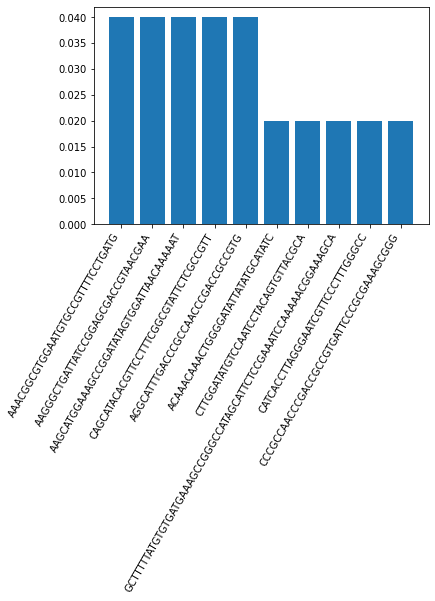

In [70]:
abc_important_features = get_important_features_and_plot('AdaBoostClassifier')

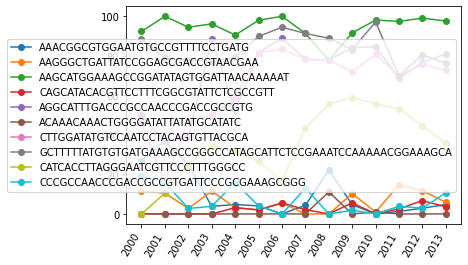

In [71]:
plot_resistance_perc_vs_year(abc_important_features)

top_predictors:  ['TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA' 'GTGTTACGCAATATATAAGGGGTTGCCGTTCC'
 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT'
 'AGGCGTTTGCGTTGCGAGGAGTTCATCTCGTATGCCGTCTTCTGC'
 'GTCAAACCTGCCGACCCTTCACAGCATTCGCGC' 'CATCACCTTAGGGAATCGTTCCCTTTGGGCC'
 'CTTGGATATGTCCAATCCTACAGTGTTACGCA' 'ATGCGCGTCGCCTACGGACACGTCAGACACG']


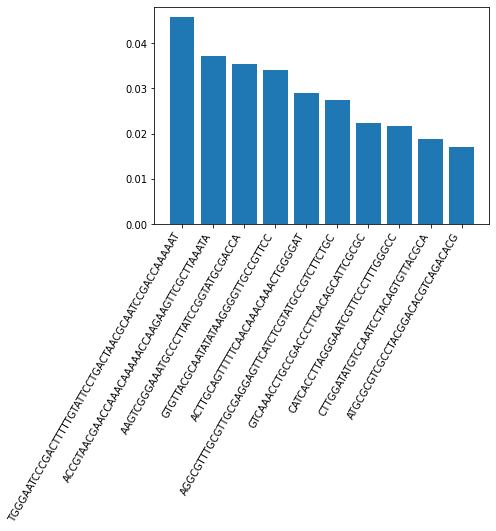

In [72]:
etc_gini_important_feature = get_important_features_and_plot('ExtraTreesClassifier - Gini')

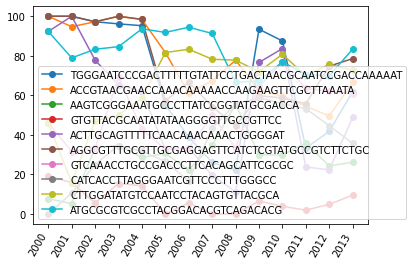

In [73]:
plot_resistance_perc_vs_year(etc_gini_important_feature)

top_predictors:  ['TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA' 'GTGTTACGCAATATATAAGGGGTTGCCGTTCC'
 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT'
 'AGGCGTTTGCGTTGCGAGGAGTTCATCTCGTATGCCGTCTTCTGC'
 'GTCAAACCTGCCGACCCTTCACAGCATTCGCGC' 'CATCACCTTAGGGAATCGTTCCCTTTGGGCC'
 'CTTGGATATGTCCAATCCTACAGTGTTACGCA' 'ATGCGCGTCGCCTACGGACACGTCAGACACG']


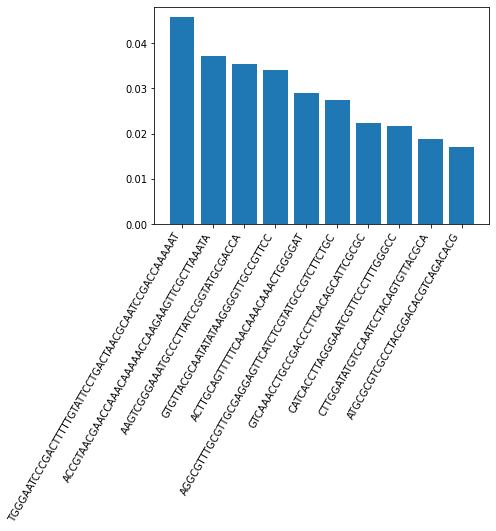

In [74]:
etc_entropy_important_feature = get_important_features_and_plot('ExtraTreesClassifier - Entropy')

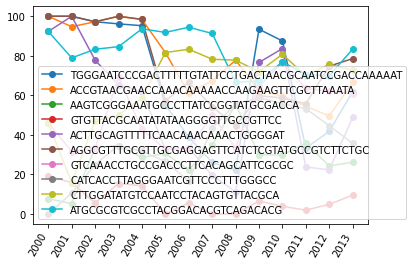

In [75]:
plot_resistance_perc_vs_year(etc_entropy_important_feature)

top_predictors:  ['GTGTTACGCAATATATAAGGGGTTGCCGTTCC' 'CGGTCAGGGCGGCAAGCAGCAGCAGGGGGCGGGCG'
 'ACAAACAAACTGGGGATATTATATGCATATC'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'AAGCATGGAAAGCCGGATATAGTGGATTAACAAAAAT' 'CTGACCCTGGACGCCGGCTACCGCTACCACA'
 'GCAATCCGACCAAAAATTACCCGCGTTGACGTAGCTAAA'
 'TTACGGTATTGTCCGCATTATTAAACTCAAA' 'AACGGCACATTCCACGCCGTTTCTTCTCTCG'
 'CGGATGTATCAGAAAGGAGAATAAATTGCAGCCTTTAGTCAGCGT']


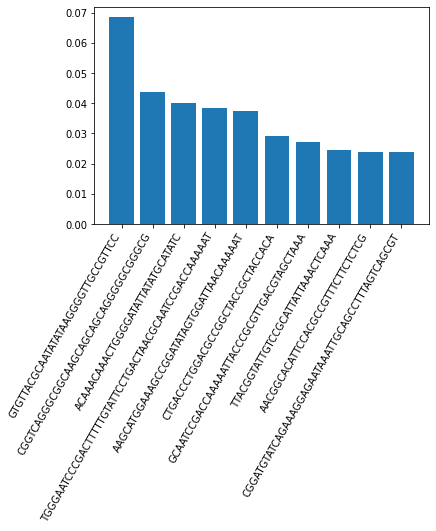

In [76]:
gbc_important_feature = get_important_features_and_plot('GradientBoostingClassifier')

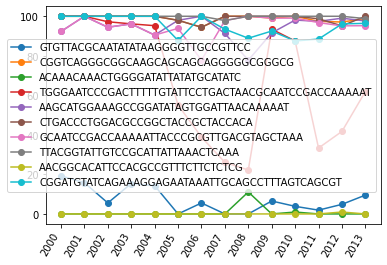

In [77]:
plot_resistance_perc_vs_year(gbc_important_feature)

top_predictors:  ['TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA'
 'AGGCGTTTGCGTTGCGAGGAGTTCATCTCGTATGCCGTCTTCTGC'
 'GTGTTACGCAATATATAAGGGGTTGCCGTTCC' 'CATCACCTTAGGGAATCGTTCCCTTTGGGCC'
 'GTCAAACCTGCCGACCCTTCACAGCATTCGCGC' 'CTTGGATATGTCCAATCCTACAGTGTTACGCA'
 'CTTGCGGGCGGCATTGTTTCCCGCCGTACCGCA']


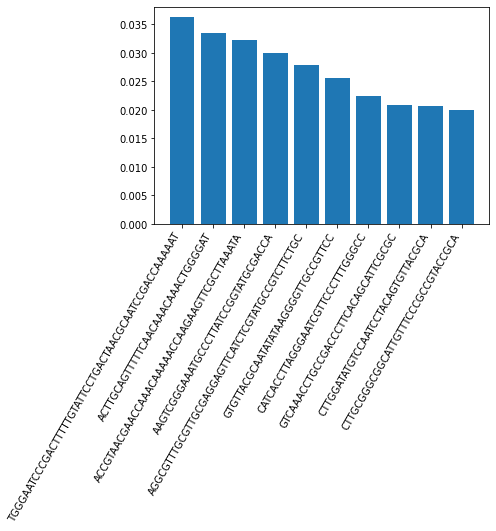

In [78]:
rfc_gini_important_feature = get_important_features_and_plot('RandomForestClassifier - Gini')

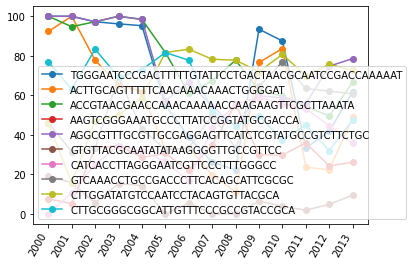

In [79]:
plot_resistance_perc_vs_year(rfc_gini_important_feature)

top_predictors:  ['TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT' 'AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA'
 'AGGCGTTTGCGTTGCGAGGAGTTCATCTCGTATGCCGTCTTCTGC'
 'GTGTTACGCAATATATAAGGGGTTGCCGTTCC' 'CATCACCTTAGGGAATCGTTCCCTTTGGGCC'
 'CTTGGATATGTCCAATCCTACAGTGTTACGCA' 'GTCAAACCTGCCGACCCTTCACAGCATTCGCGC'
 'GTTGAAAAAATCTTTAGCTACGTCAACGCGGGTAATTTTT']


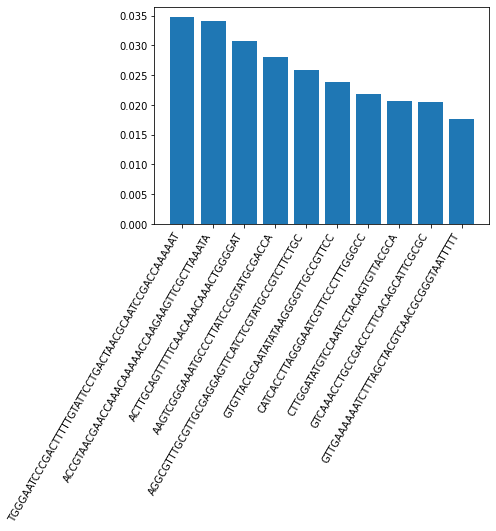

In [80]:
rfc_entropy_important_feature = get_important_features_and_plot('RandomForestClassifier - Entropy')

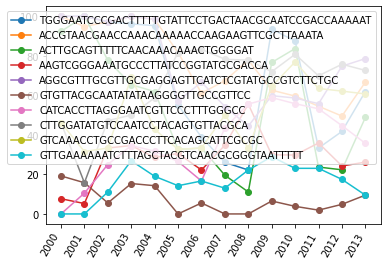

In [81]:
plot_resistance_perc_vs_year(rfc_entropy_important_feature)

# Accuracy of the models

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

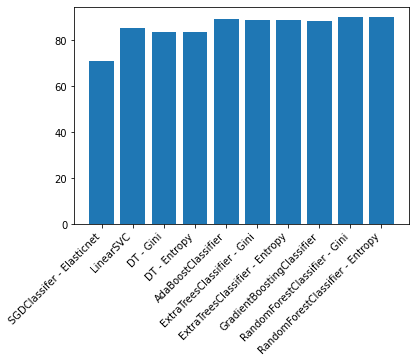

In [82]:
import matplotlib.pyplot as plt
ax = plt.bar(ml_model_df.columns, ml_model_df.T.accuracy)
plt.xticks(rotation=45, ha="right")

In [89]:
# rfc_entropy_important_feature.set_context("talk")
# plt.title("Model Performance - Azithromycin Resistance", y=1.08)
# sb.swarmplot(x=rfc_entropy_important_feature, y=performance, palette="YlGnBu_d", size=10)
# rfc_entropy_important_feature.despine()
# plt.ylabel("Balanced accuracy")
# plt.xticks(rotation=30, ha='right')

AttributeError: 'numpy.ndarray' object has no attribute 'set_context'

# Model training times

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

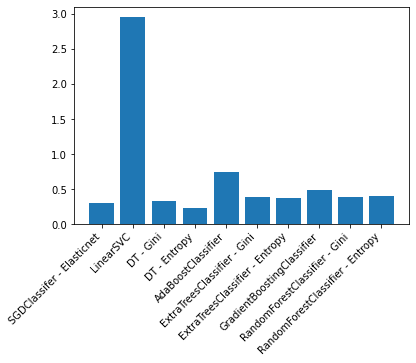

In [83]:
ax = plt.bar(ml_model_df.columns, ml_model_df.T.time)
plt.xticks(rotation=45, ha="right")


# ROC-AUC

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

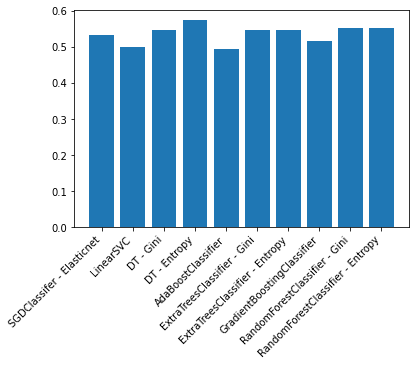

In [84]:
ax = plt.bar(ml_model_df.columns, ml_model_df.T.roc_auc_score)
plt.xticks(rotation=45, ha="right")


# Balanced Accuracy

In [90]:

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(X_train, X_test)

#ax = plt.bar(ml_model_df.columns, ml_model_df.T.metrics.balanced_accuracy_score)
#plt.xticks(rotation=45, ha="right")

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve,balanced_accuracy_score
import matplotlib.pyplot as plt
plot_balanced_accuracy_score(rfc_entropy_important_feature, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

ValueError: Found input variables with inconsistent numbers of samples: [676, 170]

In [86]:
score = balanced_accuracy_score(X_train, X_test)

ValueError: Found input variables with inconsistent numbers of samples: [676, 170]

In [ ]:
sb.set_context("talk")
plt.title("Model Performance - Azithromycin Resistance", y=1.08)
sb.swarmplot(x=method, y=performance, palette="YlGnBu_d", size=10)
sb.despine()
plt.ylabel("Balanced accuracy")
plt.xticks(rotation=30, ha='right')

In [ ]:
from collections import Counter

Counter(metadata_df['azm_sr'])

In [87]:
ml_model_df.T.roc_auc_score

SGDClassifer - Elasticnet           0.532873
LinearSVC                           0.498782
DT - Gini                           0.545049
DT - Entropy                        0.573052
AdaBoostClassifier                  0.493506
ExtraTreesClassifier - Gini         0.546266
ExtraTreesClassifier - Entropy      0.546266
GradientBoostingClassifier          0.515016
RandomForestClassifier - Gini        0.55276
RandomForestClassifier - Entropy     0.55276
Name: roc_auc_score, dtype: object

In [ ]:
# Step 1: Take important features from decision tree model
# Step 2: Construct a df with top x features and target value
# Step 3: Run this dataframe through sweetviz to find pairwise correlation to see if you can come up with a story

In [ ]:
# compare results from the different predictors
T.set_context("talk")
plt.title("Model Performance - Azithromycin Resistance", y=1.08)
T.swarmplot(x=method, y=performance, palette="YlGnBu_d", size=10)
T.despine()
plt.ylabel("Balanced accuracy")
plt.xticks(rotation=30, ha='right')

In [ ]:
metadata_year_df = metadata_df.copy()
metadata_year_df['Tot_count'] = 1
metadata_year_df = metadata_year_df.groupby(['Year'], as_index=False).sum()
metadata_year_df = metadata_year_df.drop(columns=['Azithromycin', 'Group', 'Log2(Azithromycin)', 'azm_sr'])
metadata_year_df = metadata_year_df[metadata_year_df['Tot_count']>10]

metadata_year_azm_df = metadata_df.copy()
metadata_year_azm_df['Count'] = 1
metadata_year_azm_df = metadata_year_azm_df.groupby(['Year','azm_sr'], as_index=False).sum()
metadata_year_azm_df = metadata_year_azm_df.drop(columns=['Azithromycin', 'Group', 'Log2(Azithromycin)'])
metadata_year_azm_df = pd.merge(metadata_year_azm_df, metadata_year_df, on='Year')
metadata_year_azm_df['%'] = metadata_year_azm_df['Count']*100/metadata_year_azm_df['Tot_count']

print(tabulate(metadata_year_azm_df, headers=metadata_year_azm_df.columns))

metadata_year_azm_1_df = metadata_year_azm_df[metadata_year_azm_df.azm_sr == 1]
X = np.array(list(metadata_year_azm_1_df['Year']))
y = np.array(list(metadata_year_azm_1_df['%']))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

plot_linear_regression(X, y)

# predict the trend till 2025
# dont plot if the number of tests is less than 10

In [ ]:
metadata_max_dict = {}
metadata_max_0_dict = {}
metadata_max_1_dict = {}

for year in metadata_year_azmsr_dict:
  metadata_max_dict[year] = max(list(metadata_year_azmsr_dict[year]))

for year in metadata_year_azmsr_1_dict:
  metadata_max_1_dict[year] = max(list(metadata_year_azmsr_1_dict[year]))

# metadata_max_dict=dict(sorted(metadata_max_dict.items()))
metadata_max_1_dict=dict(sorted(metadata_max_1_dict.items()))

# All samples
# X = np.array(list(metadata_max_dict.keys()))
# y = np.array(list(metadata_max_dict.values()))
# X = X.reshape(len(X),1)
# y = y.reshape(len(y),1)

# plot_linear_regression(X, y)
# plot_poly_regression(X, y)

# AZM = 1
X = np.array(list(metadata_max_1_dict.keys()))
y = np.array(list(metadata_max_1_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

plot_linear_regression(X, y)
plot_poly_regression(X, y)

In [48]:
##Trials

In [99]:
import pandas as pd
df4 = pd.read_csv('final.csv')
df4.head()

,pattern_id,Sample_ID,Year,Country,Continent,Azithromycin,Group,azm_mic,log2_azm_mic,azm_sr,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,17150_8#68,17150_8#68,2000,USA,America,1.0,762,1.0,0.0,0,...,1,1,1,1,1,1,1,1,1,1
1,17150_8#69,17150_8#69,2000,USA,America,2.0,1,2.0,1.0,0,...,1,1,1,1,1,1,1,1,1,1
2,17150_8#70,17150_8#70,2000,USA,America,2.0,1,2.0,1.0,0,...,1,1,1,1,1,1,1,1,1,1
3,17150_8#71,17150_8#71,2000,USA,America,1.0,1,1.0,0.0,0,...,1,1,1,1,1,1,1,1,1,1
4,17150_8#72,17150_8#72,2000,USA,America,1.0,171,1.0,0.0,0,...,1,1,1,1,1,1,1,1,1,1


In [152]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Columns: 525 entries, pattern_id to TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
dtypes: float64(3), int64(518), object(4)
memory usage: 4.5+ MB


In [171]:
gen1 = df4[df4.TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT > 0]
gen1

,pattern_id,Sample_ID,Year,Country,Continent,Azithromycin,Group,azm_mic,log2_azm_mic,azm_sr,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,17150_8#68,17150_8#68,2000,USA,America,1.000,762,1.000,0.0,0,...,1,1,1,1,1,1,1,1,1,1
1,17150_8#69,17150_8#69,2000,USA,America,2.000,1,2.000,1.0,0,...,1,1,1,1,1,1,1,1,1,1
2,17150_8#70,17150_8#70,2000,USA,America,2.000,1,2.000,1.0,0,...,1,1,1,1,1,1,1,1,1,1
3,17150_8#71,17150_8#71,2000,USA,America,1.000,1,1.000,0.0,0,...,1,1,1,1,1,1,1,1,1,1
4,17150_8#72,17150_8#72,2000,USA,America,1.000,171,1.000,0.0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,17176_1#4,17176_1#4,2013,USA,America,0.250,561,0.250,-2.0,0,...,1,1,1,1,1,1,1,1,1,1
1109,17176_1#5,17176_1#5,2013,USA,America,1.000,206,1.000,0.0,0,...,1,1,1,1,1,1,1,1,1,1
1110,17176_1#6,17176_1#6,2013,USA,America,0.500,971,0.500,-1.0,0,...,1,1,1,1,1,1,1,1,1,1
1111,17176_1#7,17176_1#7,2013,USA,America,0.125,854,0.125,-3.0,0,...,1,1,1,1,1,1,1,1,1,1


In [172]:
gen1.to_numpy()

array([['17150_8#68', '17150_8#68', 2000, ..., 1, 1, 1],
       ['17150_8#69', '17150_8#69', 2000, ..., 1, 1, 1],
       ['17150_8#70', '17150_8#70', 2000, ..., 1, 1, 1],
       ...,
       ['17176_1#6', '17176_1#6', 2013, ..., 1, 1, 1],
       ['17176_1#7', '17176_1#7', 2013, ..., 1, 1, 1],
       ['17176_1#8', '17176_1#8', 2013, ..., 1, 1, 1]], dtype=object)

In [254]:
X = gen1[['AAGCATGGAAAGCCGGATATAGTGGATTAACAAAAAT']]
y = gen1['azm_sr']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [255]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)

0.8908045977011494

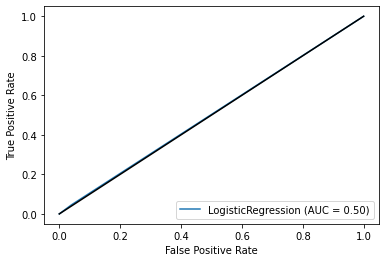

In [256]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
plot_roc_curve(lr_clf, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [ ]:
def Check(list_of_disp):
    ax = plt.gca()
    for i in list_of_disp: 
        i.plot(ax=ax)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
    plt.show()

list_of_disp = [GNB_disp,model2_disp,forest_disp, svc_disp]
Check(list_of_disp)

In [177]:
#Linear regression

In [252]:
X = gen1[['AAGCATGGAAAGCCGGATATAGTGGATTAACAAAAAT']]
y = gen1['Azithromycin']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [253]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)

0.0021426167201699098

In [183]:
#Manova

In [259]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [260]:
from scipy import linalg, stats

import pandas as pd

from statsmodels.multivariate.manova import MANOVA

In [268]:
maov = MANOVA.from_formula('AAGCATGGAAAGCCGGATATAGTGGATTAACAAAAAT + CACTGTAGGATTGGACATATCCAAGCTGACA +TAAAGCGTTCTAAATCTCCCCCCCCCCCCCC +TTATTATAGGGAAGGCGTTCCCCGGAGCACCCAGGAGGC + CTGACCCTGGACGCCGGCTACCGCTACCACA +ATCTGCACGCACGTTAAAGCCGATAATGAACGC + GGGAACGCCTTCCCTATAATAAGACGGCAATACGAATATATG + AAACGGCGTGGAATGTGCCGTTTTCCTGATG + AGGCATTTGACCCGCCAACCCGACCGCCGTG + CGGATGTATCAGAAAGGAGAATAAATTGCAGCCTTTAGTCAGCGT ~ azm_sr' , data = df4)

In [269]:
print(maov.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value    Num DF   Den DF   F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda   0.0061 10.0000 1103.0000 17876.1271 0.0000
         Pillai's trace   0.9939 10.0000 1103.0000 17876.1271 0.0000
 Hotelling-Lawley trace 162.0682 10.0000 1103.0000 17876.1271 0.0000
    Roy's greatest root 162.0682 10.0000 1103.0000 17876.1271 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
          azm_sr          Value    Num DF    Den DF   F Value  Pr > F
---------------------------------------------------------------------
           Wilks' lambda  0.8771  10.0000  1103.0000 